# Importing Libraries

In [1]:
from PIL import Image # for Processing Images
import numpy as np # for using np arrays
import cv2

# Importing and Processing the Image

In [2]:
!git clone https://github.com/yeetholmes619/Cryptography
!git clone https://github.com/opencv/opencv

Cloning into 'Cryptography'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.
Cloning into 'opencv'...
remote: Enumerating objects: 305196, done.
remote: Total 305196 (delta 0), reused 0 (delta 0), pack-reused 305196
Receiving objects: 100% (305196/305196), 494.52 MiB | 26.91 MiB/s, done.
Resolving deltas: 100% (212380/212380), done.
Checking out files: 100% (7045/7045), done.


In [4]:
#Testing = Image.open('Cryptography/images.png')
Testing = Image.open('opencv/samples/data/basketball1.png')

In [5]:
Testing = np.array(Testing)

In [6]:
np.unique(Testing)

array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [7]:
Testing.shape

(480, 640)

In [12]:
binarr = np.where(Testing>100, 0,1)
# Covert numpy array back to image 
binimg = Image.fromarray(np.where(binarr>0,0,255).astype(np.uint8),mode = 'L').convert('1')

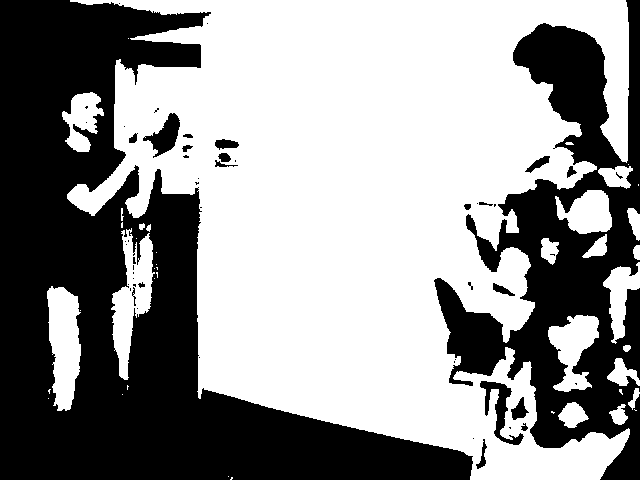

In [13]:
binimg

In [25]:
binimg.size

(640, 480)

In [14]:
def showbinIMG(binArray):
  return Image.fromarray(np.where(binArray>0,0,255).astype(np.uint8),mode = 'L').convert('1')


In [ ]:
Image.open('Cryptography/color-image.png').convert('CMYK').save('Cryptography/color-image-cmyk.tif')

In [55]:
colorimg = Image.open('Cryptography/color-image-2.png')
#colorimg = Image.open('opencv/samples/data/fruits.jpg')
#colorimg = Image.new(size = (500,500),color = (255,255,0), mode = 'RGB')

In [56]:
pixels = colorimg.load()

In [57]:
colorimg.size

(1972, 1479)

In [58]:
pixels[0,0]

(49, 86, 83)

In [59]:
colorimg

Output hidden; open in https://colab.research.google.com to view.

In [60]:
colorimg.mode

'RGB'

In [61]:
colorimg = colorimg.convert('CMYK')

In [62]:
def showIMG(img):
  return img.convert('RGB')

In [63]:
showIMG(colorimg)

Output hidden; open in https://colab.research.google.com to view.

# Making a function that would encrypt using a 2,2 scheme

## Declaring C1 and C2 globally

In [15]:
C1 = np.array([[1,1,0,0],[1,1,0,0]])
C2 = np.array([[1,1,0,0],[0,0,1,1]])
C1
C2

array([[1, 1, 0, 0],
       [0, 0, 1, 1]])

## Making the function that returns the shares

In [16]:
def genWhite():
  np.random.shuffle(np.transpose(C1))
  return C1
def genBlack():
  np.random.shuffle(np.transpose(C2))
  return C2

## BasicVisualCrypt

In [17]:
class BasicVisualCrypt:
  def __init__(self,binarray):
    self.secret = binarray
  def Sharing(self):
    self.share1 = np.zeros((self.secret.shape[0]*2,self.secret.shape[1]*2),dtype=np.int64)
    self.share2 = np.zeros((self.secret.shape[0]*2,self.secret.shape[1]*2),dtype =np.int64)
    for i in range(len(self.secret)):
      for j in range(len(self.secret[0])):
        if(self.secret[i,j] == 1):
          pixshare = genBlack()
        else:
          pixshare = genWhite()
        self.share1[i*2,j*2] = pixshare[0,0]
        self.share1[i*2,j*2+1] = pixshare[0,1]
        self.share1[i*2+1,j*2] = pixshare[0,2]
        self.share1[i*2+1,j*2+1] = pixshare[0,3]
        self.share2[i*2,j*2] = pixshare[1,0]
        self.share2[i*2,j*2+1] = pixshare[1,1]
        self.share2[i*2+1,j*2] = pixshare[1,2]
        self.share2[i*2+1,j*2+1] = pixshare[1,3]
  def Recovery(self):
    return np.bitwise_or(self.share1,self.share2)
    
  
      
  

In [18]:
test = BasicVisualCrypt(binarr)

In [20]:
test.Sharing()

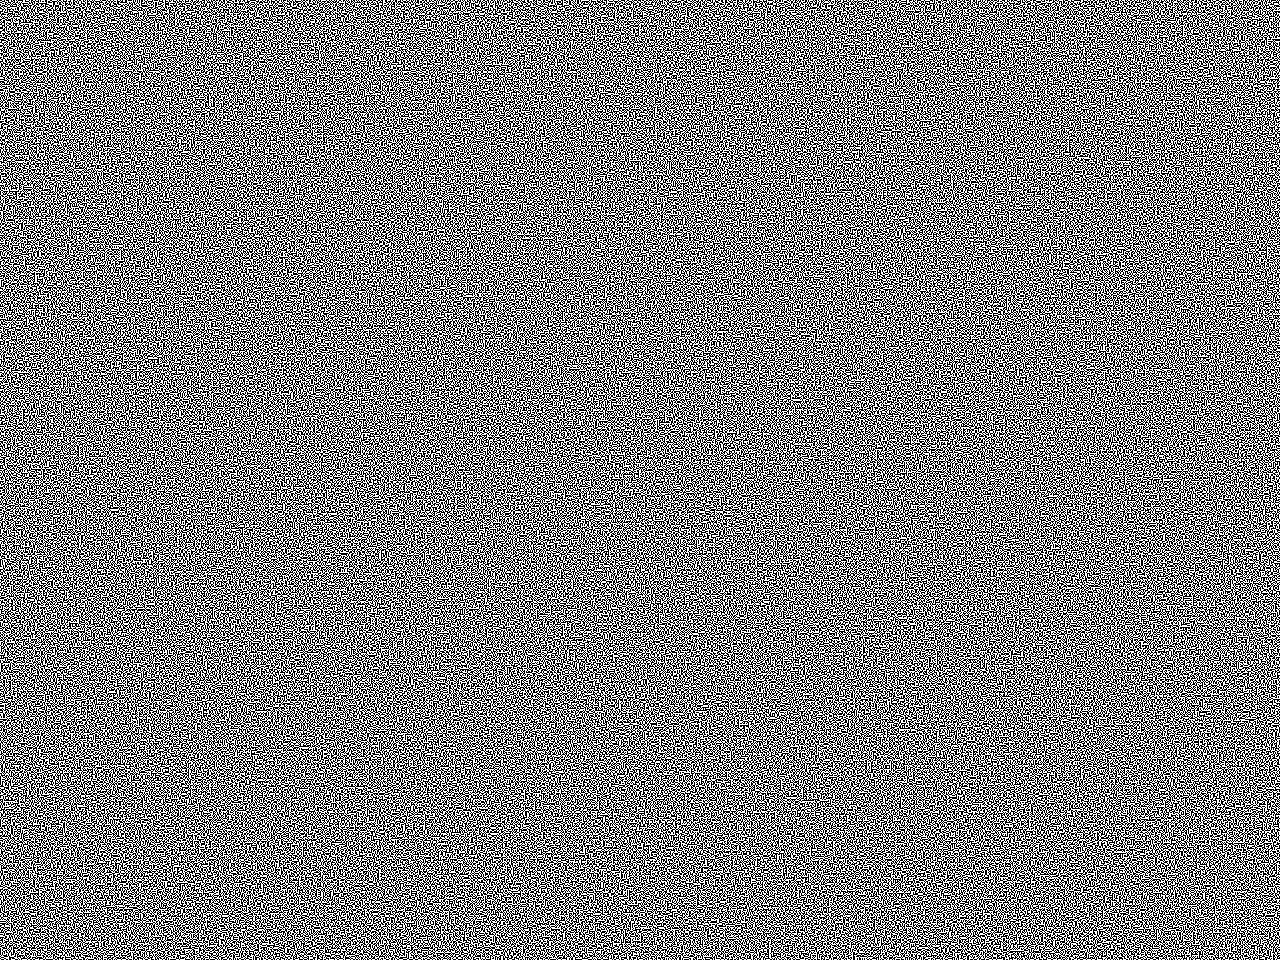

In [21]:
showbinIMG(test.share1)

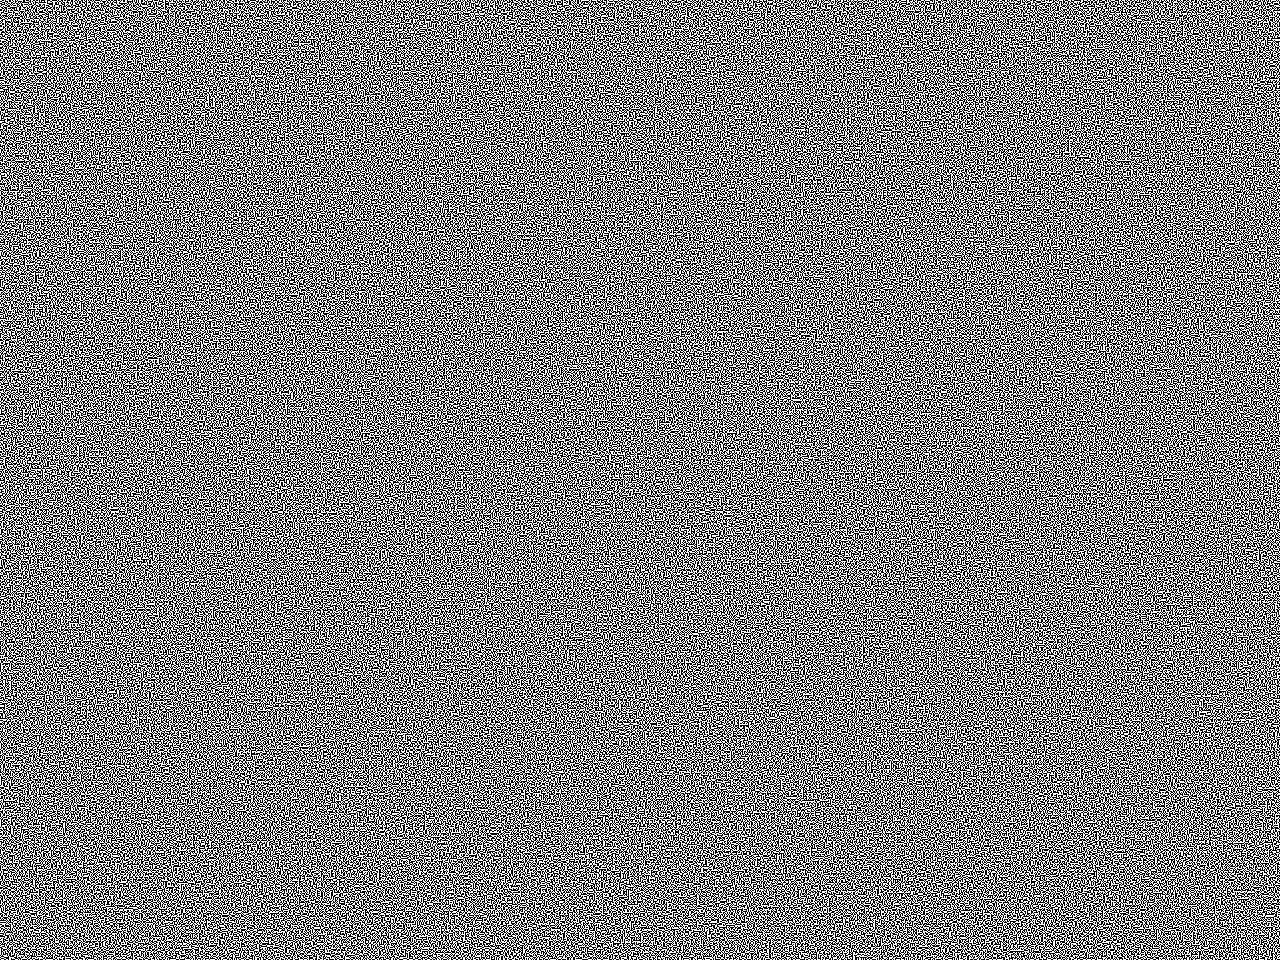

In [22]:
showbinIMG(test.share2)

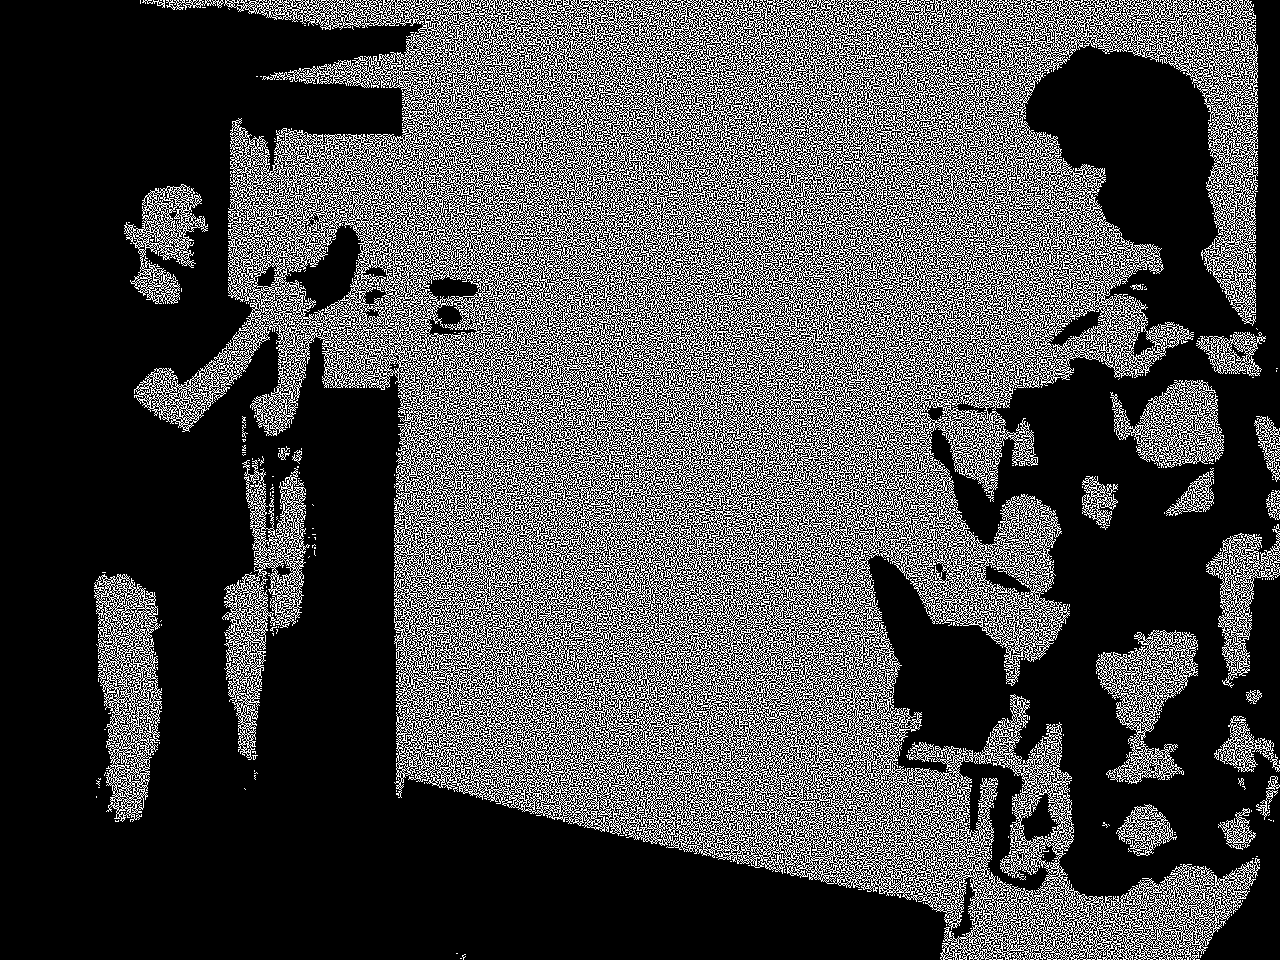

In [24]:
showbinIMG(test.Recovery())

# Trying Color Visual Cryptography

## Splitting image into Cyan, Magenta and Yellow

In [64]:
white = (0,0,0,0)
black = (255,255,255,0)
cyan = (255,0,0,0)
yellow = (0,0,255,0)
magenta = (0,255,0,0)
def halftone(img):
  cyan_decomp,yellow_decomp,magenta_decomp,dummy = Image.Image.split(img)

  yellow_decomp = yellow_decomp.convert('1')
  cyan_decomp = cyan_decomp.convert('1')
  magenta_decomp = magenta_decomp.convert('1')

  cyan_hf = Image.new(size = img.size,mode = "CMYK",color = white)
  yellow_hf = Image.new(size = img.size,mode = "CMYK",color = white)
  magenta_hf = Image.new(size = img.size,mode = "CMYK",color = white)

  for x in range(img.size[0]):
    for y in range(img.size[1]):
      cd = (x,y)

      if(yellow_decomp.getpixel(cd) == 255):
        yellow_hf.putpixel(cd,yellow)
      
      if(cyan_decomp.getpixel(cd) == 255):
        cyan_hf.putpixel(cd,cyan)

      if(magenta_decomp.getpixel(cd) == 255):
        magenta_hf.putpixel(cd,magenta)
  return cyan_hf,magenta_hf,yellow_hf





In [65]:
cyan_hf,magenta_hf,yellow_hf = halftone(colorimg)

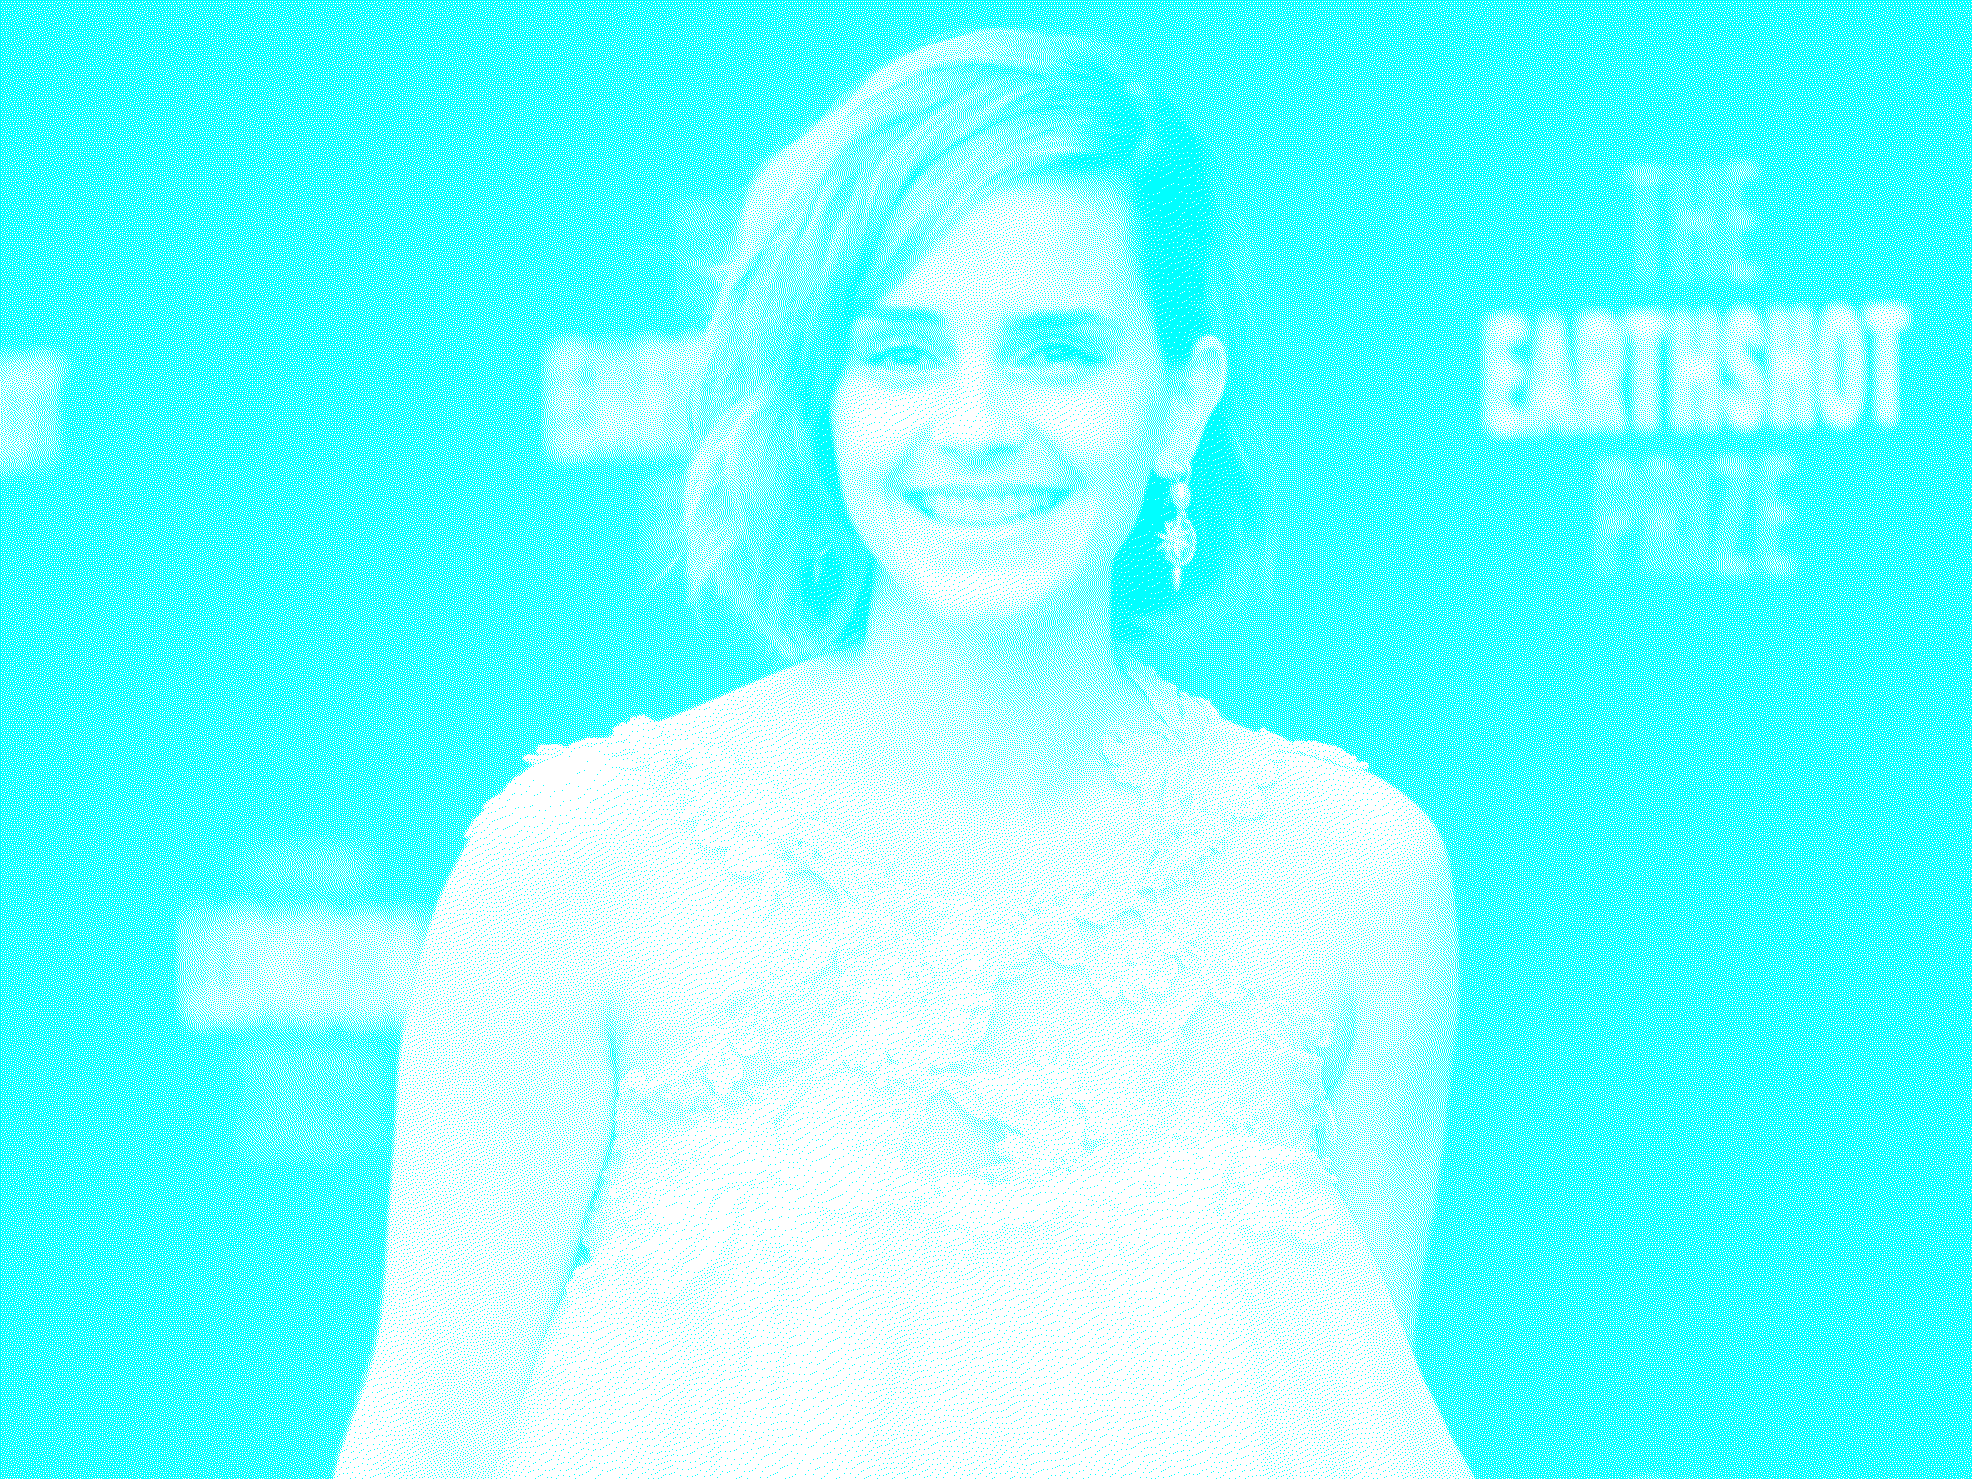

In [66]:
showIMG(cyan_hf)

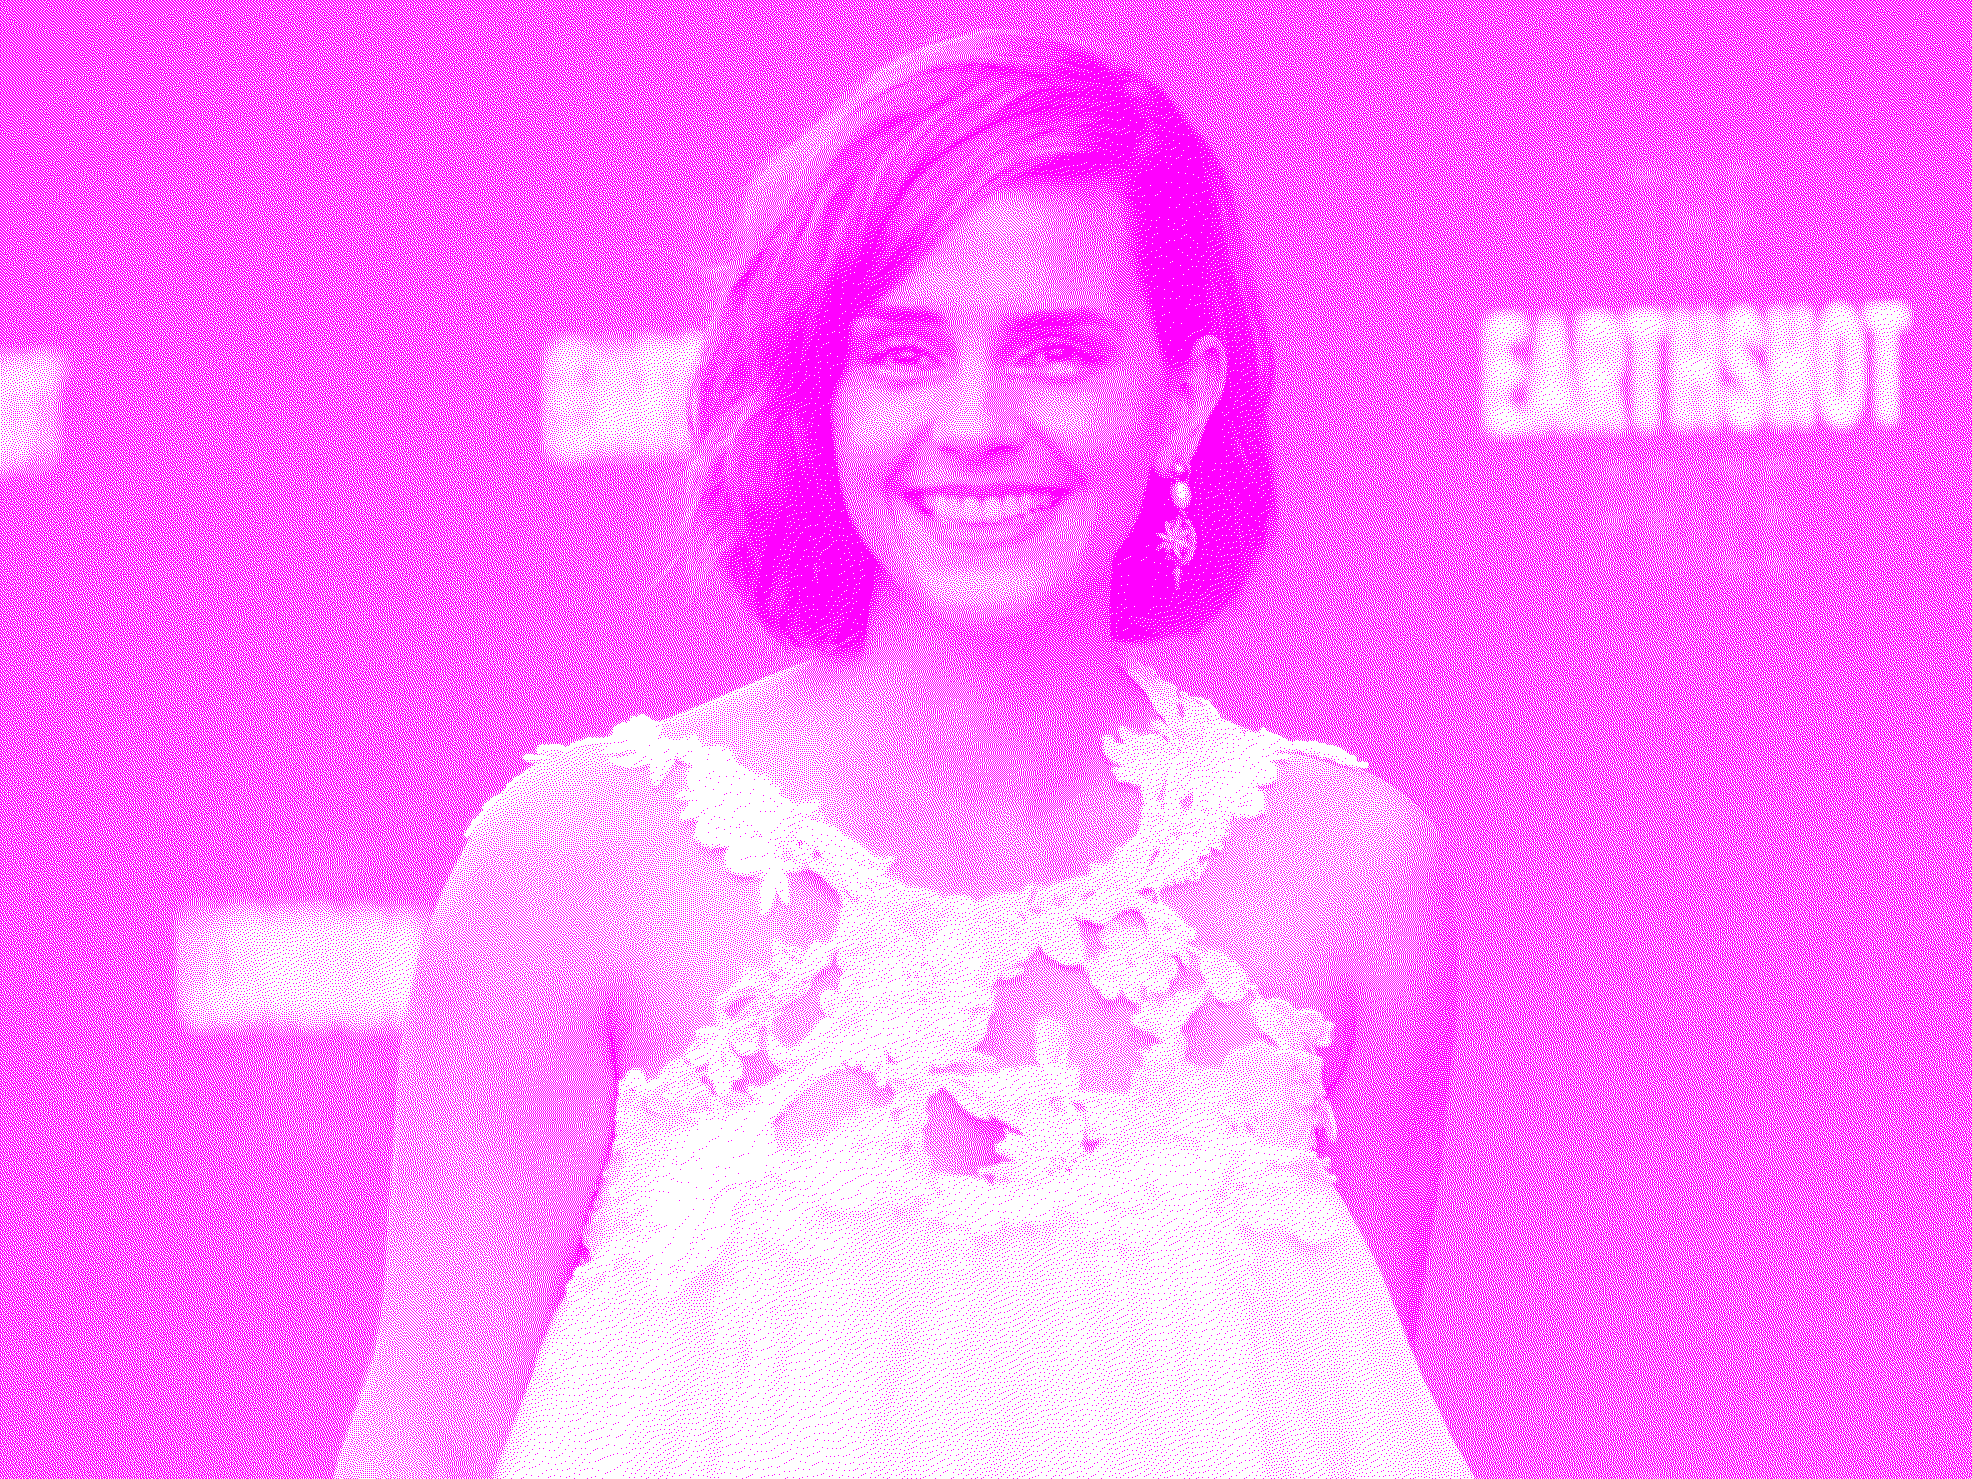

In [67]:
showIMG(magenta_hf)

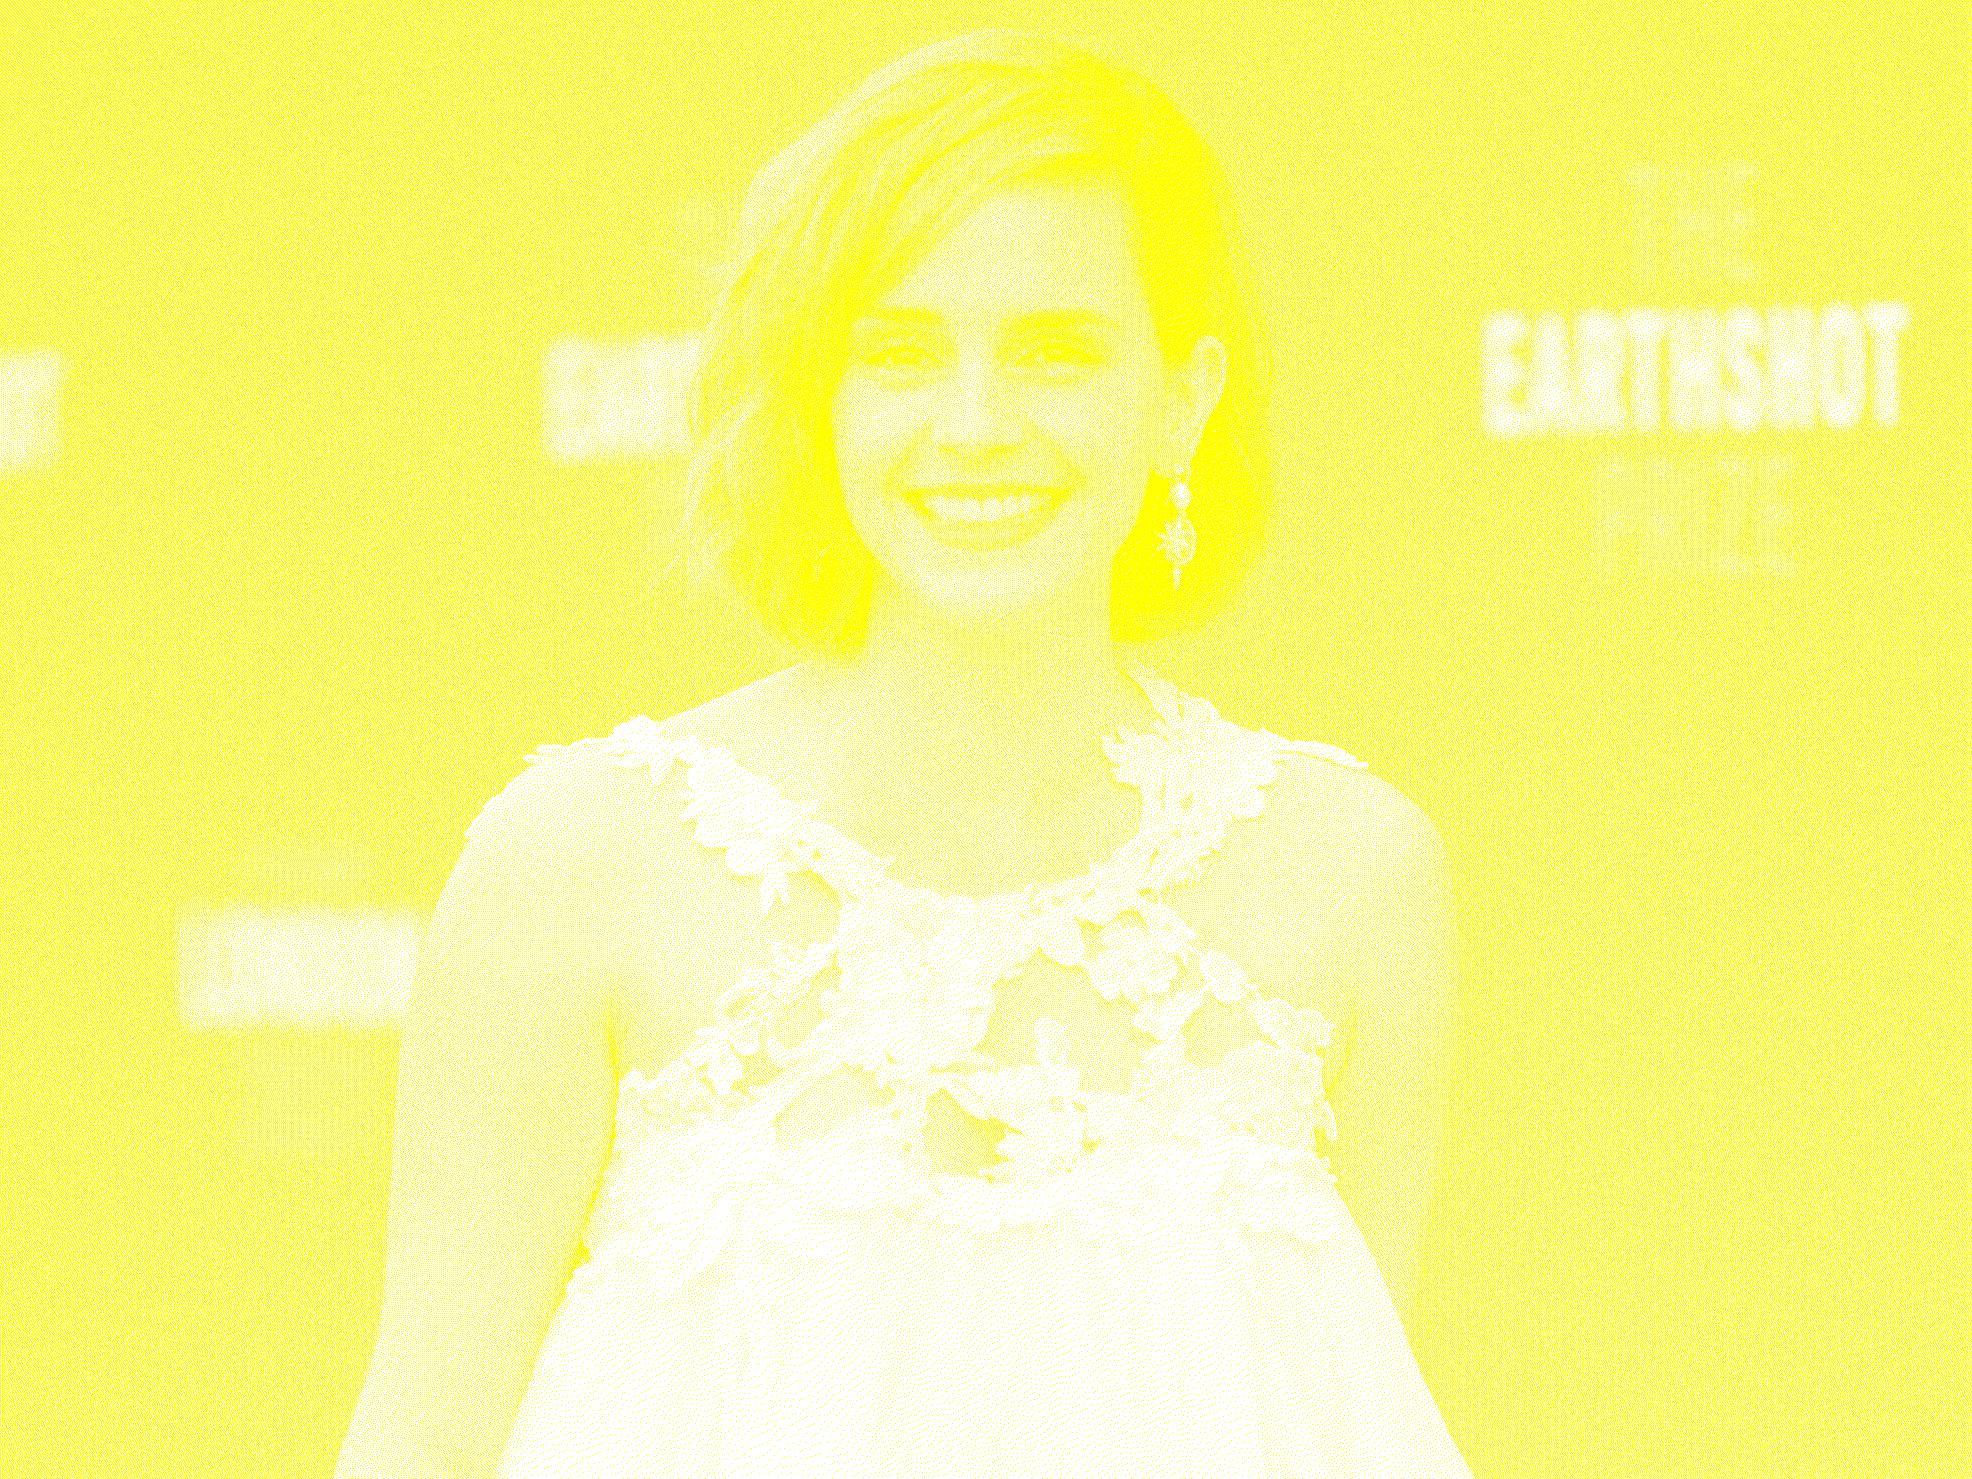

In [68]:
showIMG(yellow_hf)

## Sharing

In [69]:
def sharing(img):
  cyan_hf,magenta_hf,yellow_hf = halftone(img)
  rows = img.size[0]
  cols = img.size[1]
  share_cyan = Image.new(size = (rows*2,cols*2),mode= "CMYK",color=white)
  share_magenta = Image.new(size = (rows*2,cols*2),mode= "CMYK",color=white)
  share_yellow = Image.new(size = (rows*2,cols*2),mode= "CMYK",color=white)
  share_mask = Image.new(size = (rows*2,cols*2),mode= "CMYK",color=white)
  mask_pix = np.array([0,0,1,1])
  
  shares = [share_cyan,share_magenta,share_yellow]
  for x in range(rows):
    for y in range(cols):
      cd = (x,y)
      np.random.shuffle(mask_pix)
      whiteArr = [cyan if cyan_hf.getpixel(cd) == cyan else white,magenta if magenta_hf.getpixel(cd) == magenta else white,yellow if yellow_hf.getpixel(cd) == yellow else white]
      blackArr = [white if cyan_hf.getpixel(cd) == cyan else cyan,white if magenta_hf.getpixel(cd) == magenta else magenta,white if yellow_hf.getpixel(cd) == yellow else yellow]

      coordinates = [(x*2,y*2),(x*2,y*2+1),(x*2+1,y*2),(x*2+1,y*2+1)]
      for i in range(4):
        if mask_pix[i] == 0:
          share_mask.putpixel(coordinates[i],black)
          for shareID in range(len(shares)):
            shares[shareID].putpixel(coordinates[i],blackArr[shareID])
        else:
          for shareID in range(len(shares)):
            shares[shareID].putpixel(coordinates[i],whiteArr[shareID])
  
  return share_cyan,share_magenta,share_yellow,share_mask

In [70]:
share_cyan,share_magenta,share_yellow,share_mask = sharing(colorimg)

In [71]:
showIMG(share_cyan)

Output hidden; open in https://colab.research.google.com to view.

In [72]:
showIMG(share_magenta)

Output hidden; open in https://colab.research.google.com to view.

In [73]:
showIMG(share_yellow)

Output hidden; open in https://colab.research.google.com to view.

In [74]:
showIMG(share_mask)

Output hidden; open in https://colab.research.google.com to view.

## Recovery

In [75]:
def mixPix(c,m,y,k):
  if(k == black):
    return black
  return (c[0],m[1],y[2],0)


In [76]:
def Recover(share1,share2,share3,share4):
  fin = Image.new(size= share1.size,mode= "CMYK",color = white)
  rows= share1.size[0]
  cols = share2.size[1]
  fin_pix = fin.load()
  for i in range(rows):
    for j in range(cols):
      cd = (i,j)
      fin_pix[i,j] =mixPix(share1.getpixel(cd),share2.getpixel(cd),share3.getpixel(cd),share4.getpixel((i,j)))
  return fin


In [77]:
test = Recover(share_cyan,share_magenta,share_yellow,share_mask)

In [78]:
showIMG(test)

Output hidden; open in https://colab.research.google.com to view.

## Analysis

In [79]:
imgWithoutMask = Image.new(size = share_cyan.size,mode = "CMYK")
rows = share_cyan.size[0]
cols = share_cyan.size[1]
imgWithoutMaskPix = imgWithoutMask.load()

for row in range(rows):
  for col in range(cols):
    cd = (row,col)
    imgWithoutMaskPix[row,col] = mixPix(share_cyan.getpixel(cd),share_magenta.getpixel(cd),share_yellow.getpixel(cd),white)
showIMG(imgWithoutMask)

Output hidden; open in https://colab.research.google.com to view.

In [80]:
imgWithoutMask = Image.new(size = share_cyan.size,mode = "CMYK")
rows = share_cyan.size[0]
cols = share_cyan.size[1]
imgWithoutMaskPix = imgWithoutMask.load()

for row in range(rows):
  for col in range(cols):
    cd = (row,col)
    imgWithoutMaskPix[row,col] = mixPix(share_cyan.getpixel(cd),share_magenta.getpixel(cd),white,share_mask.getpixel(cd))
showIMG(imgWithoutMask)

Output hidden; open in https://colab.research.google.com to view.

In [81]:
imgWithoutMask = Image.new(size = share_cyan.size,mode = "CMYK")
rows = share_cyan.size[0]
cols = share_cyan.size[1]
imgWithoutMaskPix = imgWithoutMask.load()

for row in range(rows):
  for col in range(cols):
    cd = (row,col)
    imgWithoutMaskPix[row,col] = mixPix(share_cyan.getpixel(cd),white,white,share_mask.getpixel(cd))
showIMG(imgWithoutMask)

Output hidden; open in https://colab.research.google.com to view.